# Imports and Data Load

In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from sklearn.feature_extraction.text import TfidfVectorizer

from Functions import *

In [130]:
# Printing Errors
def errors(model,error_func,X_tr,X_te,y_tr,y_te,squared=False):
    train_error = error_func(y_tr,model.predict(X_tr))
    test_error = error_func(y_te,model.predict(X_te))
    if squared:
        train_error = train_error**.5
        test_error = test_error**.5
    print("Train Error:",round(train_error))
    print("Test Error:",round(test_error))

In [4]:
df = pickle.load(open(r"Data\players_cleaned_df.pickle","rb"))

# Base Model

## Train Test Validation Split
- Using 80% of the data to train

In [11]:
X = df['title']
y = df['views']
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X,y,test_size=150,random_state=4521)
X_train_f_pre,X_val_pre,y_train_f,y_val = train_test_split(X_train_pre,y_train,test_size=100,random_state=4521)

## TF IDF Vectorizing

In [12]:
tf = TfidfVectorizer(preprocessor=splitter, lowercase=False)
fit_tf = tf.fit(X_train_f_pre)

In [18]:
X_train_f = tf.transform(X_train_f_pre).todense()
X_val = tf.transform(X_val_pre).todense()
X_test = tf.transform(X_test_pre).todense()

## Modeling

### Loss on RMSE

In [27]:
# Building Model
model_mse = models.Sequential()
model_mse.add(layers.Dense(units=100,activation='relu',input_shape=(X_train_f.shape[1],)))
model_mse.add(layers.Dense(units=50,activation='relu'))
model_mse.add(layers.Dropout(rate=0.3))
model_mse.add(layers.Dense(units=50,activation='relu'))
model_mse.add(layers.Dropout(rate=0.3))
model_mse.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mse.compile(optimizer='adam',
             loss='mse',
             metrics=['mse'])

In [28]:
# Callbacks to save best model and weights
mse_callback = ModelCheckpoint(r'Data/model_mse.h5',monitor='val_mse',mode='min',save_best_only=True)

In [29]:
# Training Step
history_mse = model_mse.fit(X_train_f, y_train_f, batch_size=5,epochs=50,validation_data=(X_val,y_val),
                            callbacks=[mse_callback])

Epoch 1/50
201/201 [==============================] - 0s 2ms/step - loss: 22838530048.0000 - mse: 22838530048.0000 - val_loss: 22451339264.0000 - val_mse: 22451339264.0000
Epoch 2/50
201/201 [==============================] - 0s 1ms/step - loss: 20139864064.0000 - mse: 20139864064.0000 - val_loss: 15682059264.0000 - val_mse: 15682059264.0000
Epoch 3/50
201/201 [==============================] - 0s 2ms/step - loss: 13101888512.0000 - mse: 13101888512.0000 - val_loss: 10695510016.0000 - val_mse: 10695510016.0000
Epoch 4/50
201/201 [==============================] - 0s 1ms/step - loss: 11194861568.0000 - mse: 11194862592.0000 - val_loss: 10332577792.0000 - val_mse: 10332577792.0000
Epoch 5/50
201/201 [==============================] - 0s 1ms/step - loss: 10587468800.0000 - mse: 10587468800.0000 - val_loss: 10179020800.0000 - val_mse: 10179020800.0000
Epoch 6/50
201/201 [==============================] - 0s 1ms/step - loss: 10265857024.0000 - mse: 10265857024.0000 - val_loss: 10072435712.0

201/201 [==============================] - 0s 881us/step - loss: 3726327040.0000 - mse: 3726327296.0000 - val_loss: 15701762048.0000 - val_mse: 15701762048.0000
Epoch 49/50
201/201 [==============================] - 0s 846us/step - loss: 4105521664.0000 - mse: 4105521664.0000 - val_loss: 15941239808.0000 - val_mse: 15941239808.0000
Epoch 50/50
201/201 [==============================] - 0s 826us/step - loss: 3327546624.0000 - mse: 3327546624.0000 - val_loss: 15985825792.0000 - val_mse: 15985825792.0000


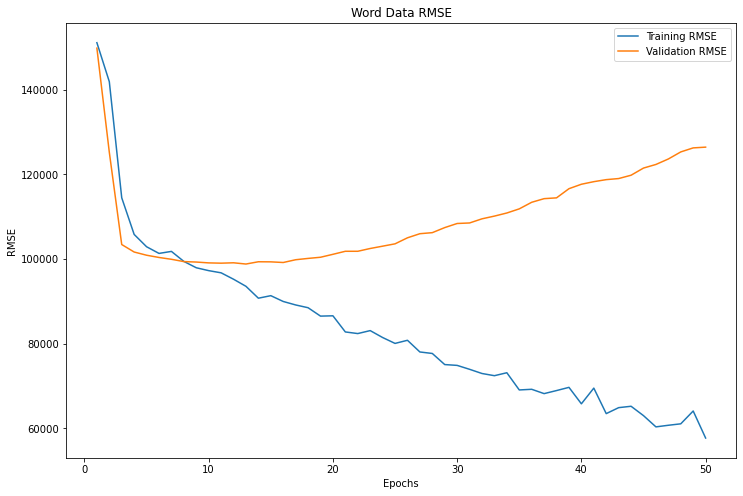

In [30]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mse.history

rmse_values = np.sqrt(model_dict['mse']) 
val_rmse_values = np.sqrt(model_dict['val_mse'])

epochs = range(1, len(rmse_values) + 1)
ax.plot(epochs, rmse_values, label='Training RMSE')
ax.plot(epochs, val_rmse_values, label='Validation RMSE')
plt.legend()
plt.title('Word Data RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

#### Best Results

In [132]:
best_mse = load_model(r'Data/model_mse.h5')
errors(best_mse,mean_squared_error,X_train_f, X_test,y_train_f,y_test,squared=True)

Train Error: 90881
Test Error: 80217


### Loss on MAE

In [32]:
# Building Model
model_mae = models.Sequential()
model_mae.add(layers.Dense(units=100,activation='relu',input_shape=(X_train_f.shape[1],)))
model_mae.add(layers.Dense(units=50,activation='relu'))
model_mae.add(layers.Dropout(rate=0.3))
model_mae.add(layers.Dense(units=50,activation='relu'))
model_mae.add(layers.Dropout(rate=0.3))
model_mae.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mae.compile(optimizer='adam',
             loss='mae',
             metrics=['mae'])

In [33]:
# Callbacks to save best model and weights
mae_callback = ModelCheckpoint(r'Data/model_mae.h5',monitor='val_mae',mode='min',save_best_only=True)

In [34]:
# Training Step
history_mae = model_mae.fit(X_train_f, y_train_f, batch_size=5,epochs=50,validation_data=(X_val,y_val),
                            callbacks=[mae_callback])

Epoch 1/50
201/201 [==============================] - 0s 2ms/step - loss: 107059.2500 - mae: 107059.2500 - val_loss: 105093.3672 - val_mae: 105093.3672
Epoch 2/50
201/201 [==============================] - 0s 1ms/step - loss: 88814.8203 - mae: 88814.8203 - val_loss: 60696.4141 - val_mae: 60696.4141
Epoch 3/50
201/201 [==============================] - 0s 1ms/step - loss: 55141.0547 - mae: 55141.0547 - val_loss: 51562.8906 - val_mae: 51562.8906
Epoch 4/50
201/201 [==============================] - 0s 1ms/step - loss: 51207.8789 - mae: 51207.8789 - val_loss: 49960.6406 - val_mae: 49960.6406
Epoch 5/50
201/201 [==============================] - 0s 1ms/step - loss: 49641.7109 - mae: 49641.7109 - val_loss: 49521.6758 - val_mae: 49521.6758
Epoch 6/50
201/201 [==============================] - 0s 2ms/step - loss: 48228.4805 - mae: 48228.4805 - val_loss: 48308.3516 - val_mae: 48308.3516
Epoch 7/50
201/201 [==============================] - 0s 1ms/step - loss: 48173.9023 - mae: 48173.9023 - val

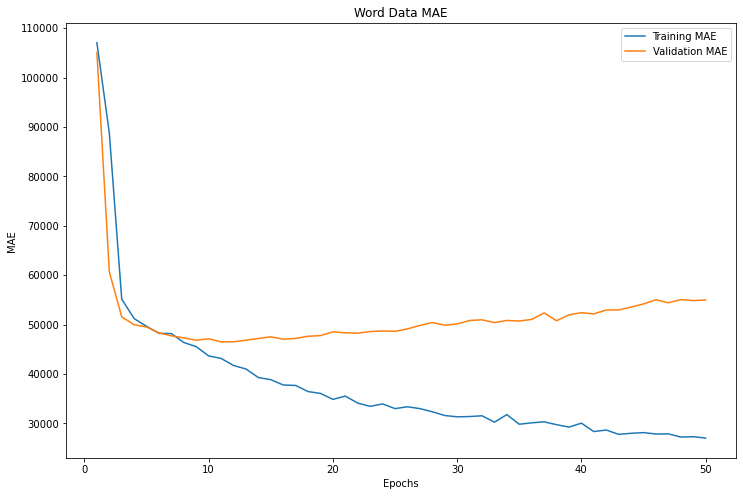

In [35]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mae.history

mae_values = model_dict['mae']
val_mae_values = model_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE')
plt.legend()
plt.title('Word Data MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

#### Best Results

In [133]:
best_mae = load_model(r'Data/model_mae.h5')
errors(best_mae,mean_absolute_error,X_train_f, X_test,y_train_f,y_test,squared=False)

Train Error: 39117
Test Error: 47137


# Model After Removing Outliers

## Outlier Removal using IQR along with Train Test Validation Split

In [37]:
round(y_train.describe(),2)

count       1102.00
mean      107397.09
std       106641.20
min         8088.00
25%        54421.00
50%        81922.00
75%       127335.75
max      1783323.00
Name: views, dtype: float64

In [81]:
iqr_df = pickle.load(open(r"Data\players_cleaned_df.pickle","rb"))

In [85]:
X_iqr = iqr_df[['title']]
y_iqr = iqr_df[['views']]

X_train_iqr_pre,X_test_iqr_pre,y_train_iqr,y_test_iqr = train_test_split(X_iqr,y_iqr,test_size=150,random_state=4521)

In [86]:
# Obtaining Lower and Upper Limits using IQR
q25 = y_train_iqr['views'].describe()['25%']
q75 = y_train_iqr['views'].describe()['75%']
iqr = q75-q25
low_lim = q25-1.5*iqr
upp_lim = q75+1.5*iqr

In [87]:
# Resetting Index to use to help filtering out locations of outliers
X_train_iqr_pre.reset_index(inplace=True)
X_test_iqr_pre.reset_index(inplace=True)
y_train_iqr.reset_index(inplace=True)
y_test_iqr.reset_index(inplace=True)

In [88]:
# Finding Indexes within range
train_keep_in = y_train_iqr['views'].index[(low_lim < y_train_iqr['views']) & (y_train_iqr['views'] < upp_lim)]
test_keep_in = y_test_iqr['views'].index[(low_lim < y_test_iqr['views']) & (y_test_iqr['views'] < upp_lim)]

In [109]:
# New Train and Test data after removing outliers based on train
X_train_iqrf_pre = X_train_iqr_pre.iloc[train_keep_in].drop('index',axis=1)['title']
y_train_iqrf = np.array(y_train_iqr.iloc[train_keep_in].drop('index',axis=1))
X_test_iqrf_pre = X_test_iqr_pre.iloc[test_keep_in].drop('index',axis=1)['title']
y_test_iqrf = np.array(y_test_iqr.iloc[test_keep_in].drop('index',axis=1))

In [110]:
# Validation Split
X_train_val_iqr_pre,X_val_iqr_pre,y_train_val_iqr,y_val_iqr = train_test_split(X_train_iqrf_pre,
                                                                               y_train_iqrf,
                                                                               test_size=100,random_state=4521)

## Refitting TFIDF Vectorizer

In [111]:
tf_o = TfidfVectorizer(preprocessor=splitter, lowercase=False)
fit_tf_o = tf_o.fit(X_train_val_iqr_pre)

In [150]:
X_train_val_iqr = tf_o.transform(X_train_val_iqr_pre).todense()
X_val_iqr = tf_o.transform(X_val_iqr_pre).todense()
X_test_iqrf = tf_o.transform(X_test_iqrf_pre).todense()

## Modeling P2

### Loss on RMSE

In [146]:
# Building Model
model_mse_iqr = models.Sequential()
model_mse_iqr.add(layers.Dense(units=100,activation='relu',input_shape=(X_train_val_iqr.shape[1],)))
model_mse_iqr.add(layers.Dense(units=50,activation='relu'))
model_mse_iqr.add(layers.Dropout(rate=0.3))
model_mse_iqr.add(layers.Dense(units=50,activation='relu'))
model_mse_iqr.add(layers.Dropout(rate=0.3))
model_mse_iqr.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mse_iqr.compile(optimizer='adam',
             loss='mse',
             metrics=['mse'])

In [147]:
# Callbacks to save best model and weights
mse_iqr_callback = ModelCheckpoint(r'Data/model_mse_iqr.h5',monitor='val_mse',mode='min',save_best_only=True)

In [148]:
# Training Step
history_mse_iqr = model_mse_iqr.fit(X_train_val_iqr, y_train_val_iqr,
                                    batch_size=5,epochs=50,
                                    validation_data=(X_val_iqr,y_val_iqr),
                                    callbacks=[mse_iqr_callback])

Epoch 1/50
186/186 [==============================] - 0s 2ms/step - loss: 9685949440.0000 - mse: 9685949440.0000 - val_loss: 9267685376.0000 - val_mse: 9267685376.0000
Epoch 2/50
186/186 [==============================] - 0s 2ms/step - loss: 7747325952.0000 - mse: 7747325952.0000 - val_loss: 4264439040.0000 - val_mse: 4264439040.0000
Epoch 3/50
186/186 [==============================] - 0s 2ms/step - loss: 2929756160.0000 - mse: 2929756160.0000 - val_loss: 1519690496.0000 - val_mse: 1519690496.0000
Epoch 4/50
186/186 [==============================] - 0s 1ms/step - loss: 2064872064.0000 - mse: 2064872064.0000 - val_loss: 1439320576.0000 - val_mse: 1439320576.0000
Epoch 5/50
186/186 [==============================] - 0s 2ms/step - loss: 1910513408.0000 - mse: 1910513536.0000 - val_loss: 1398416000.0000 - val_mse: 1398416000.0000
Epoch 6/50
186/186 [==============================] - 0s 898us/step - loss: 1735401216.0000 - mse: 1735401216.0000 - val_loss: 1405992576.0000 - val_mse: 140599

186/186 [==============================] - 0s 882us/step - loss: 521813696.0000 - mse: 521813696.0000 - val_loss: 2112945152.0000 - val_mse: 2112945152.0000
Epoch 50/50
186/186 [==============================] - 0s 863us/step - loss: 435736512.0000 - mse: 435736512.0000 - val_loss: 2202697728.0000 - val_mse: 2202697728.0000


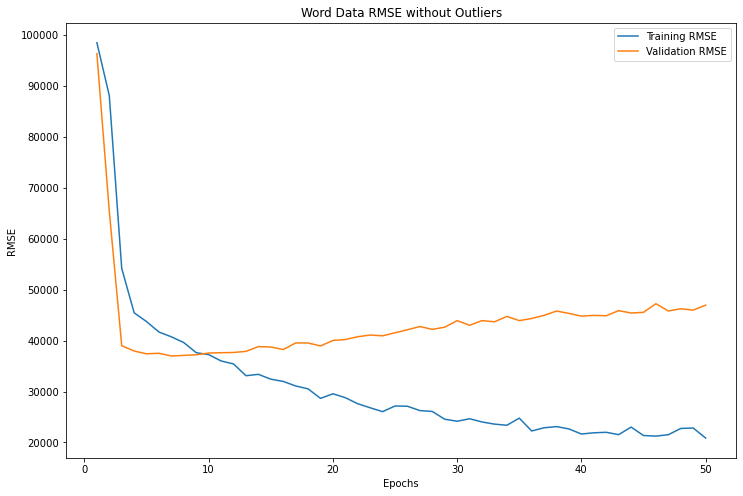

In [149]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mse_iqr.history

rmse_values = np.sqrt(model_dict['mse']) 
val_rmse_values = np.sqrt(model_dict['val_mse'])

epochs = range(1, len(rmse_values) + 1)
ax.plot(epochs, rmse_values, label='Training RMSE')
ax.plot(epochs, val_rmse_values, label='Validation RMSE')
plt.legend()
plt.title('Word Data RMSE without Outliers')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

#### Best Results

In [151]:
best_mse_iqr = load_model(r'Data/model_mse_iqr.h5')
errors(best_mse_iqr,mean_squared_error,X_train_val_iqr,X_test_iqrf,
       y_train_val_iqr,y_test_iqrf,squared=True)

Train Error: 36380
Test Error: 40608


### Loss on MAE

In [152]:
# Building Model
model_mae_iqr = models.Sequential()
model_mae_iqr.add(layers.Dense(units=100,activation='relu',input_shape=(X_train_val_iqr.shape[1],)))
model_mae_iqr.add(layers.Dense(units=50,activation='relu'))
model_mae_iqr.add(layers.Dropout(rate=0.3))
model_mae_iqr.add(layers.Dense(units=50,activation='relu'))
model_mae_iqr.add(layers.Dropout(rate=0.3))
model_mae_iqr.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mae_iqr.compile(optimizer='adam',
             loss='mae',
             metrics=['mae'])

In [153]:
# Callbacks to save best model and weights
mae_iqr_callback = ModelCheckpoint(r'Data/model_mae_iqr.h5',monitor='val_mae',mode='min',save_best_only=True)

In [154]:
# Training Step
history_mae_iqr = model_mae_iqr.fit(np.array(X_train_val_iqr), y_train_val_iqr,
                                    batch_size=5,epochs=50,
                                    validation_data=(np.array(X_val_iqr),y_val_iqr),
                                    callbacks=[mae_iqr_callback])

Epoch 1/50
186/186 [==============================] - 0s 2ms/step - loss: 86405.5547 - mae: 86405.5547 - val_loss: 87384.7578 - val_mae: 87384.7578
Epoch 2/50
186/186 [==============================] - 0s 2ms/step - loss: 72802.7734 - mae: 72802.7734 - val_loss: 49190.3594 - val_mae: 49190.3594
Epoch 3/50
186/186 [==============================] - 0s 2ms/step - loss: 39102.6953 - mae: 39102.6953 - val_loss: 29263.2109 - val_mae: 29263.2109
Epoch 4/50
186/186 [==============================] - 0s 1ms/step - loss: 34387.9648 - mae: 34387.9648 - val_loss: 28607.5625 - val_mae: 28607.5625
Epoch 5/50
186/186 [==============================] - 0s 1ms/step - loss: 32368.6602 - mae: 32368.6602 - val_loss: 27824.9844 - val_mae: 27824.9844
Epoch 6/50
186/186 [==============================] - 0s 1ms/step - loss: 30887.4297 - mae: 30887.4297 - val_loss: 27319.6426 - val_mae: 27319.6426
Epoch 7/50
186/186 [==============================] - 0s 2ms/step - loss: 29838.5332 - mae: 29838.5332 - val_los

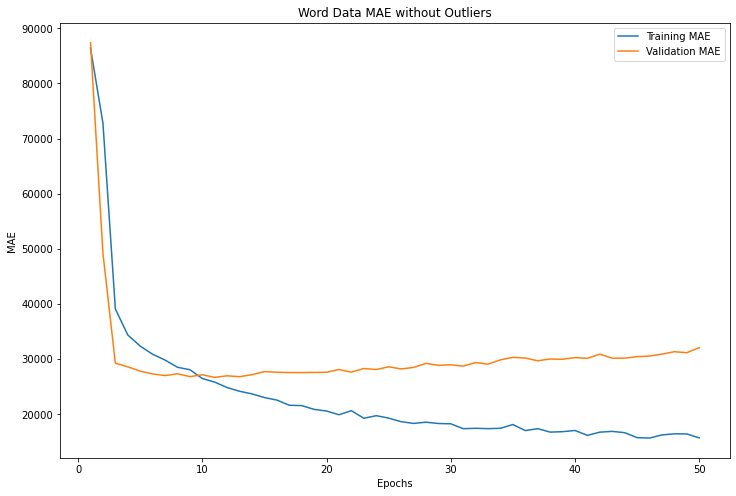

In [155]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mae_iqr.history

mae_values = model_dict['mae']
val_mae_values = model_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE')
plt.legend()
plt.title('Word Data MAE without Outliers')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

#### Best Results

In [156]:
best_mae_iqr = load_model(r'Data/model_mae_iqr.h5')
errors(best_mae_iqr,mean_absolute_error,X_train_val_iqr,X_test_iqrf,
       y_train_val_iqr,y_test_iqrf,squared=False)

Train Error: 22225
Test Error: 30460


# Findings
- Loss on MAE produced the lowest error overall
- Removing outliers improved model performance

# Final Stats

In [157]:
y_test_preds = best_mae_iqr.predict(np.array(X_test_iqrf))
y_train_preds = best_mae_iqr.predict(np.array(X_train_val_iqr))

In [158]:
print("Average Views:",round(y_iqr.mean()[0]))
print("Train MAE:",round(mean_absolute_error(y_train_val_iqr,y_train_preds)))
print("Test MAE:",round(mean_absolute_error(y_test_iqrf,y_test_preds)))

Average Views: 107615
Train MAE: 22225
Test MAE: 30460


# Exporting MAE Model without Outliers

In [35]:
best_mae_iqr.save(r'Data\model.h5')
best_mae_iqr.save_weights(r'Data\model_weights.h5')